# import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats


# Read dataset
- we have two dataset file 
- one is in csv format which is used for tobular format data
- another is json format which is often used for database to return data corresponding to query

In [2]:
df=pd.read_csv('fma-rock-vs-hiphop.csv')
data=pd.read_json("echonest-metrics.json")

# 1. cleaning preparing our dataset

# first merge the relevent columns of both dataset

In [3]:
tracks=pd.merge(data,
               df[['track_id','genre_top']],
                on='track_id'
               )

In [4]:
tracks.head(3)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB



# check null values

In [6]:
tracks.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

# task 2 check pairwise relationship

 # check correlation
   - in order to avoid overfitting we will check features if some features are
   - highly correlated then we will drop that features

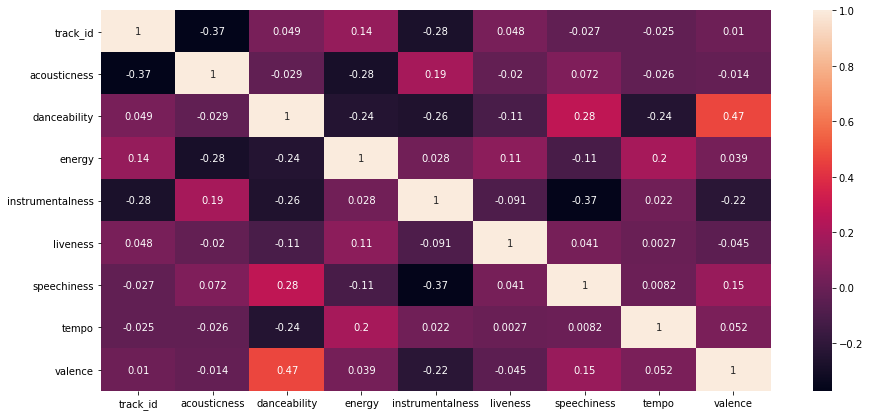

In [7]:
plt.rcParams["figure.figsize"] = (15,7)
sns.heatmap(tracks.corr(),annot=True)
plt.show()

In [8]:
tracks.shape

(4802, 10)

In [9]:
tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


# normalization
- we have different range data so,we will do normalization in order to bring in same range
- all the data

In [10]:
# features
predictor_feature=tracks.drop(['track_id','genre_top'],axis=1)

# target variable
target_label=tracks.genre_top

In [11]:
print(predictor_feature.shape,target_label.shape)

(4802, 8) (4802,)


 # import normalize method from sklearn library

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(predictor_feature)

In [13]:
scaled_feature

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

In [14]:
scaled_feature=pd.DataFrame(scaled_feature,columns=predictor_feature.columns)

In [15]:
scaled_feature.head(2)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811


In [16]:
scaled_feature.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4.802000e+03,4.802000e+03,4.802000e+03,4.802000e+03,4.802000e+03,4.802000e+03,4.802000e+03
mean,-3.814802e-16,-1.373791e-16,6.919820e-17,-3.551234e-16,-6.788036e-17,-5.502563e-18,-2.627821e-16,3.001902e-16
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00
min,-1.323166e+00,-2.099645e+00,-2.560586e+00,-1.604727e+00,-1.080731e+00,-5.595117e-01,-2.870530e+00,-1.646716e+00
25%,-1.096295e+00,-7.657885e-01,-7.145543e-01,-1.166493e+00,-5.576050e-01,-4.658790e-01,-8.437675e-01,-8.581896e-01
50%,7.777413e-02,-9.324209e-02,9.526894e-02,5.436509e-01,-4.312099e-01,-3.788652e-01,-6.066202e-02,-2.690839e-02
75%,1.001128e+00,7.018813e-01,8.683103e-01,8.271408e-01,1.803653e-01,-1.136730e-01,7.283186e-01,8.008160e-01
max,1.382056e+00,2.863024e+00,1.535257e+00,1.033445e+00,5.203683e+00,5.902585e+00,3.628674e+00,1.988851e+00


# split the data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,target_label,test_size=0.3)

# train decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [19]:
predict=model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
accuracy_score(predict,y_test)

0.9104788341429563

In [22]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

     Hip-Hop       0.73      0.77      0.75       252
        Rock       0.95      0.94      0.95      1189

    accuracy                           0.91      1441
   macro avg       0.84      0.86      0.85      1441
weighted avg       0.91      0.91      0.91      1441



# logistic model

In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
logistic_model=LogisticRegression(max_iter=3000)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [25]:
pred=logistic_model.predict(x_test)

In [26]:
accuracy_score(pred,y_test)

0.9014573213046495

In [27]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

     Hip-Hop       0.61      0.81      0.70       201
        Rock       0.97      0.92      0.94      1240

    accuracy                           0.90      1441
   macro avg       0.79      0.86      0.82      1441
weighted avg       0.92      0.90      0.91      1441



# without principal componet analaysis both model perform same almost

# -----------------------------------------------------------
# -----------------------------------------------------------

# pca 

In [29]:
x_train.shape

(3361, 8)

In [30]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train)

PCA()

In [31]:
pca.explained_variance_ratio_

array([0.24478974, 0.17807603, 0.13777983, 0.12989854, 0.1105718 ,
       0.08248281, 0.06937527, 0.04702598])

### pca.explained_variance_Ratio_ gonna tell us how much each principal component contain data

# visualization

<BarContainer object of 8 artists>

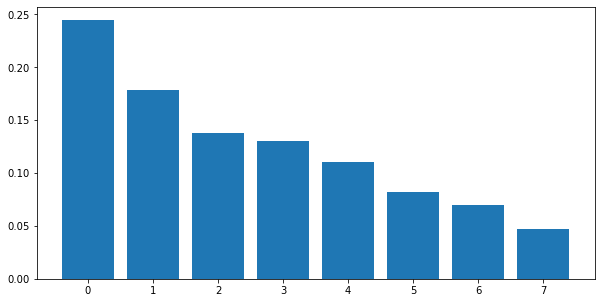

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(range(8),pca.explained_variance_ratio_)

In [38]:
sum(pca.explained_variance_ratio_[:7])

0.9529740228070667

In [39]:
x_train_pca=pd.DataFrame(pca.fit_transform(x_train))

In [42]:
x_train_pca.head(2)

,0,1,2,3,4,5,6,7
0,-1.524062,0.144942,0.573791,1.158058,-0.615421,-1.610283,0.233670,-1.027214
1,-0.333362,-1.474511,0.872798,-0.091454,-0.911522,-1.659314,0.647769,0.529578


# we are gonna select 7 feature which contain maximum data

In [47]:
x_train_select=x_train_pca.iloc[:,:7]
x_train_select.head(2)

,0,1,2,3,4,5,6
0,-1.524062,0.144942,0.573791,1.158058,-0.615421,-1.610283,0.233670
1,-0.333362,-1.474511,0.872798,-0.091454,-0.911522,-1.659314,0.647769


In [51]:
x_test_pca=pca.fit(x_test)
x_test_pca

PCA()

In [52]:
x_test_select=pd.DataFrame(pca.fit_transform(x_test)).iloc[:,:7]

In [53]:
x_test.head(2)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
1067,1.132021,-0.590108,-0.354679,0.662568,1.54714,-0.437669,0.877206,0.753756
812,0.916829,0.673555,-1.896754,-1.604717,-0.15359,3.908666,0.733731,-0.281924


# decision tree after done pca

In [54]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train_select,y_train)

DecisionTreeClassifier(max_depth=4)

In [55]:
pred=model.predict(x_test_select)

In [56]:
accuracy_score(pred,y_test)

0.8764746703678001

# logistic model after done pca

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic_model=LogisticRegression(max_iter=3000)
logistic_model.fit(x_train_select,y_train)

LogisticRegression(max_iter=3000)

In [59]:
pred=logistic_model.predict(x_test_select)

In [60]:
accuracy_score(pred,y_test)

0.8792505204718946

# we can conclude here that after doing pca we can see that accuracy drop
- it is due to low feature because we have select 7 feature in original data we have 8 feature which is not more for pca
- so, if we have minimum feature then we don't need pca 